## Aplicar as técnicas seguintes:

•	Random Forest (RF) 

•	ExtraTreesClassiﬁer (ETC)

•	XGBoost (XGB) com Early Stopping

•	Gaussian Naive Bayes


## Preparando os dados para treinar

In [ ]:

import warnings
warnings.filterwarnings('ignore')

import itertools

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt


from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.naive_bayes import GaussianNB

from xgboost.sklearn import XGBClassifier

In [ ]:

def plot_confusion_matrix(cm, classes=['Desistente', 'Não Desistente'],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        pass
        # print('Confusion matrix, without normalization')

    #print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 18)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 10)
    plt.yticks(tick_marks, classes, size = 10)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 15)
    plt.xlabel('Predicted label', size = 15)

# Confusion matrix
# cm = confusion_matrix(y_test, y_predict)
#plot_confusion_matrix(cm, classes = ['Poor Health', 'Good Health'],
#                      title = 'Health Confusion Matrix')
# plot_confusion_matrix(cm, classes = ['Desistente', 'Não Desistente'],
#                      title = 'Confusion Matrix')
# plt.savefig('cm.png')

## importando os dataframes para treino

In [ ]:
df1 = pd.read_csv('/content/drive/Shared drives/iniciacao_cientifica_2019_2020/dataframes_treino/turma_102_2016_1/Dataframe1_Turma_102_2016_06_07_12_00_00_2016_06_30_11_55_00.csv', sep=';')

In [ ]:
df_target_user = pd.read_csv('/content/drive/Shared drives/iniciacao_cientifica_2019_2020/csv_datasets/usuarios_classificados.csv')

## Criando um merge entre o df_target_user e df1

In [ ]:
df_target_user = df_target_user[['semester_id', 'class_id', 'user_id', 'target']]

In [ ]:
df1_data_target = pd.merge(df1, df_target_user, on=['semester_id', 'class_id', 'user_id'], how='inner')

In [ ]:
df1_data_target.drop(['semester_id', 'class_id', 'user_id'], axis=1, inplace=True)

In [ ]:
df1_data_target

,number_logins,average_active_time,average_exam_sub_comp,average_exam_sub_inc,average_exam_sub_err,average_exam_test,average_exam_test_err,average_exam_code_line,average_exam_sub_average_interval,average_homework_sub_comp,average_homework_sub_inc,average_homework_sub_err,average_homework_test,average_homework_test_err,average_homework_code_line,average_homework_test_average,target
0,6,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,44.000,0.000,Desistente
1,13,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,194.500,0.000,Desistente
2,21,257.255,0.500,3.167,0.333,10.667,0.833,1270.000,84.333,0.463,2.122,0.293,0.000,0.000,659.220,0.000,Não Desistente
3,8,168.600,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,46.000,0.000,Desistente
4,8,530.667,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.250,0.333,0.417,0.000,0.000,53.250,0.000,Desistente
5,13,189.463,0.333,3.750,0.250,2.083,0.583,791.583,2.847,0.559,0.632,0.485,0.456,0.250,829.441,3.100,Não Desistente
6,13,174.973,0.091,4.000,0.182,2.545,0.091,1582.091,1.515,0.302,0.238,0.095,0.857,0.556,214.317,8.211,Não Desistente
7,19,165.812,0.250,0.083,0.000,0.417,0.000,964.667,4.333,0.441,0.794,0.515,0.103,0.000,668.015,950.618,Não Desistente
8,21,188.338,0.167,0.917,0.167,1.417,0.333,714.833,9.495,0.456,1.544,0.279,0.412,0.059,336.706,2.842,Não Desistente
9,28,169.225,1.417,0.000,0.333,1.083,0.250,319.583,31.776,0.397,0.397,0.074,0.015,0.000,522.029,0.000,Não Desistente


## Preparando para treinar os dados até a primeira avaliação

In [ ]:
# pegando as colunas de features
features = df1_data_target.columns.difference(['target'])

# dados de treino
X = df1_data_target[features].values

# classe target
y = df1_data_target['target'].values

## Usando cross validation

In [ ]:
import pandas
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import numpy as np

In [ ]:
def string_2_int(row):
    if row == 'Desistente':
        return 1
    else:
        return 0

Y = []

for item in y:
    Y.append(string_2_int(item))
    # print(string_2_int(item))

print(Y)
Y = np.array(Y)
print(type(Y))


[1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0]
<class 'numpy.ndarray'>


In [ ]:
#scaler = MinMaxScaler(feature_range=(0, 1))
#X = scaler.fit_transform(X)

scores = []
rf_scores = []
et_scores = []
gnb_scores = []
xgb_scores = []

# modelos
#best_svr = SVR(kernel='rbf')
classifier_rf = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=5, n_estimators=25, verbose=0)
classifier_et = ExtraTreesClassifier(bootstrap=False, criterion='entropy', max_depth=3, n_estimators=25)
classifier_gnb = GaussianNB()
classifier_xgb = XGBClassifier(learning_rate=0.1, max_depth=2, n_estimators=60)

cv = KFold(n_splits=10,  random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index)
    print("Test Index: ", test_index, "\n")

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]

    # criando um particao de validação para o modelo xgb
    X_val, y_val = X_test[0:2], y_test[0:2]
    _X_test = X_test[2:]
    _y_test = y_test[2:]


    # treinando os modelos
    # best_svr.fit(X_train, y_train)
    classifier_rf.fit(X_train, y_train)
    classifier_et.fit(X_train, y_train)
    classifier_gnb.fit(X_train, y_train)
    classifier_xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_val, y_val)])

    # testando os modelos
    # a metrica usada é o r2
    # scores.append(best_svr.score(X_test, y_test))
    rf_scores.append(classifier_rf.score(X_test, y_test))
    et_scores.append(classifier_et.score(X_test, y_test))
    gnb_scores.append(classifier_gnb.score(X_test, y_test))
    xgb_scores.append(classifier_xgb.score(_X_test, _y_test))

print('Metrica usada r2')
# print('Média svm:', np.mean(scores))
print('Média Random Forest:', np.mean(rf_scores))
print('Média Extra Tree Classifier:', np.mean(et_scores))
print('Média XGBoost:', np.mean(xgb_scores))
print('Média Gaussian Naive Bayes:', np.mean(gnb_scores))

Train Index:  [ 0  1  2  3  4  6  7  8  9 10 11 13 14 15 16 17 18 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 42 44 45 46 48 49 50 51 52]
Test Index:  [ 5 12 19 41 43 47] 

[0]	validation_0-error:0
Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-error:0
[2]	validation_0-error:0
[3]	validation_0-error:0
[4]	validation_0-error:0
[5]	validation_0-error:0
[6]	validation_0-error:0
[7]	validation_0-error:0
[8]	validation_0-error:0
[9]	validation_0-error:0
[10]	validation_0-error:0
Stopping. Best iteration:
[0]	validation_0-error:0

Train Index:  [ 0  1  2  4  5  6  7  9 10 11 12 14 15 16 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 51 52]
Test Index:  [ 3  8 13 17 32 50] 

[0]	validation_0-error:0
Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-error:0
[2]	validation_0-error:0
[3]	validation_0-error:0
[4]	validation_0-error:0
[5]	validation_0-error:0
[6]	

## Dividindo uma parte para teste e outra para treino

In [ ]:
# dividindo uma parte dos dados para treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# verificando a forma dos dados de treino
X_train.shape, y_train.shape

((42, 16), (42,))

In [ ]:
# verificando a forma dos dados de teste
X_test.shape, y_test.shape

((11, 16), (11,))

## Utilizando um GridSearchCV e RandomForestClassifier para encontrar os melhores parâmetros

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


                precision    recall  f1-score   support

    Desistente       1.00      1.00      1.00         3
Não Desistente       1.00      1.00      1.00         8

      accuracy                           1.00        11
     macro avg       1.00      1.00      1.00        11
  weighted avg       1.00      1.00      1.00        11



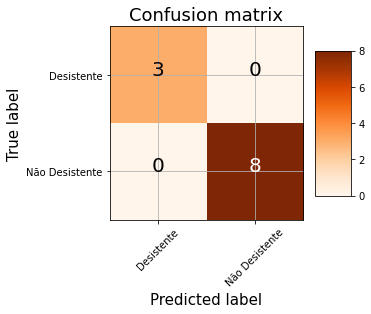

In [ ]:

# criando uma instância de RFC
classifier_rf = RandomForestClassifier(
    bootstrap=False, 
    criterion='entropy',
    max_depth=5, 
    n_estimators=25,
    verbose=1
)

# treinando o modelo
classifier_rf.fit(X_train, y_train)

# classificando o conjunto de teste
y_predict = classifier_rf.predict(X_test)

# metricas de avaliação de desempenho
print(metrics.classification_report(y_test, y_predict))

# matrix de confusão
cm = metrics.confusion_matrix(y_test, y_predict)

plot_confusion_matrix(cm)

## Encontrando os melhores parâmetros com GridSearch o ExtraTreesClassifier

                precision    recall  f1-score   support

    Desistente       1.00      1.00      1.00         3
Não Desistente       1.00      1.00      1.00         8

      accuracy                           1.00        11
     macro avg       1.00      1.00      1.00        11
  weighted avg       1.00      1.00      1.00        11



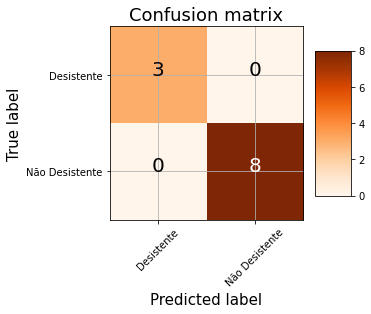

In [ ]:
# instânciando o modelo
classifier_et = ExtraTreesClassifier(
    bootstrap=False,
    criterion='entropy',
    max_depth=3,
    n_estimators=25   
)

# treinando com os dados de treino
classifier_et.fit(X_train, y_train)

# classificando o conjunto de teste
y_predict = classifier_et.predict(X_test)

# metricas de avaliação de desempenho
print(metrics.classification_report(y_test, y_predict))

# matrix de confusão
mc = confusion_matrix(y_test, y_predict)
plot_confusion_matrix(cm=mc)

## XGB e GridSearchCV para encontrar os melhores parâmetros

[0]	validation_0-error:0.090909
Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.090909
[2]	validation_0-error:0.090909
[3]	validation_0-error:0.090909
[4]	validation_0-error:0.090909
[5]	validation_0-error:0.090909
[6]	validation_0-error:0.090909
[7]	validation_0-error:0.090909
[8]	validation_0-error:0.090909
[9]	validation_0-error:0.090909
[10]	validation_0-error:0.090909
Stopping. Best iteration:
[0]	validation_0-error:0.090909

                precision    recall  f1-score   support

    Desistente       1.00      0.67      0.80         3
Não Desistente       0.89      1.00      0.94         8

      accuracy                           0.91        11
     macro avg       0.94      0.83      0.87        11
  weighted avg       0.92      0.91      0.90        11



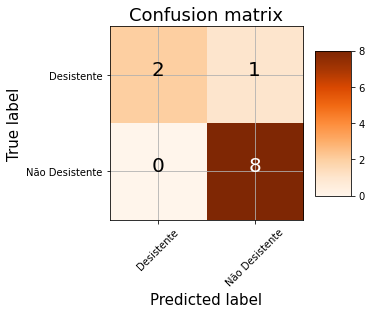

In [ ]:
classifier_xgb = XGBClassifier(
    learning_rate=0.1, 
    max_depth=2, 
    n_estimators=60
)

# treinando o xgb
classifier_xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)])

# classificando o conjunto de teste
y_predict = classifier_xgb.predict(X_test)

# metricas de avaliação de desempenho
print(metrics.classification_report(y_test, y_predict))

# matrix de confusão
cm = confusion_matrix(y_test, y_predict)

plot_confusion_matrix(cm=cm)

## Aplicando *Gaussian Naive Bayes* no conjunto de treinamento

                precision    recall  f1-score   support

    Desistente       1.00      0.67      0.80         3
Não Desistente       0.89      1.00      0.94         8

      accuracy                           0.91        11
     macro avg       0.94      0.83      0.87        11
  weighted avg       0.92      0.91      0.90        11



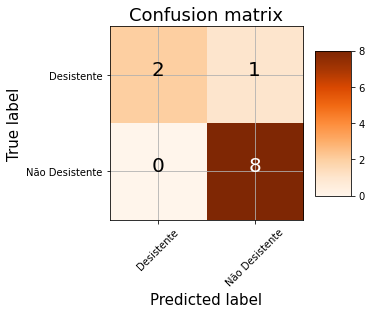

In [ ]:
# instânciando um GaussianNB
classifier_gnb = GaussianNB()

# treinando o modelo
classifier_gnb.fit(X_train, y_train)

# classificando o conjunto de teste
y_predict = classifier_gnb.predict(X_test)

# metricas de avaliação de desempenho
print(metrics.classification_report(y_test, y_predict))

# matrix de confusão
cm = confusion_matrix(y_test, y_predict)
plot_confusion_matrix(cm=cm)

## Salvando os modelos

In [ ]:
from joblib import dump, load

In [ ]:
#dump(classifier_rf, '/content/drive/Shared drives/iniciacao_cientifica_2019_2020/modelos/2016_1_102_df1/classifier_rf.joblib')
#dump(classifier_et, '/content/drive/Shared drives/iniciacao_cientifica_2019_2020/modelos/2016_1_102_df1/classifier_et.joblib')
#dump(classifier_xgb, '/content/drive/Shared drives/iniciacao_cientifica_2019_2020/modelos/2016_1_102_df1/classifier_xgb.joblib')
#dump(classifier_gnb, '/content/drive/Shared drives/iniciacao_cientifica_2019_2020/modelos/2016_1_102_df1/classifier_gnb.joblib')